# **GAUSSIAN MIXTURE MODELS**

Gaussian Mixture models are a form of Unsupervised Learning problem (Density Estimation) where the model consists of a mixture of Gaussian distributions and probability of a sample included in any one distribution is predicted.

In [1]:
# importing some basic libraries for numerical computations
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## **Gaussian Distribution**

A Gaussian Distribution, also known as a Normal Distribuion is parameterized by Mean and Variance (for a 1D gaussian) or Co-varience (for a muiltivariate gaussian).

The Gaussian Distribution for the 1-D case is as follows :
\begin{equation}
      \mathcal{N}(x|\mu,\,\sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^2}} 
  \exp\bigg\{ -\frac{1}{2\sigma^2}\left(x-\mu\right)^{\!2}\bigg\}
  \end{equation}

In [2]:
# Definition of the 1_D gaussian distribution
def gaussian_def(data, mu_k, var_k):
  diff = (data - mu_k).T
  return (1. / (2.*np.pi*var_k)**(0.5)) * np.exp(-0.5*((diff**2)*(1./var_k)))

## **Expectation Step**

Here, calculate for for each datapoint $\mathrm{x_n}$ the probability that $\mathrm{x_n}$ belongs to the kth cluster. This is the $\gamma$ function defined as responsibility and evaluated as,

$$\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n|\mu_k,\sigma^2)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n|\mu_j,\sigma^2)}$$

In [3]:
# Definition of the Expectation Step
def E_step(data, clusters):
  # For each datapoint, denominator stores the sum of the probabilities of the point  
  # belonging to a each of the clusters.
  # i.e. it stores the value of the denominator in the gamma equation for each datapoint.
  denominator = np.zeros((data.size, 1)) # (N, 1) vector
  # loop over each datapoint
  for i, datapoint in enumerate(data):
    # for each cluster calculate the numerator and update the denominator (summation
    # of the numerators calculated over all the clusters)
    for cluster in clusters:
      pi_k = cluster['pi_k']
      mu_k = cluster['mu_k']
      var_k = cluster['var_k']
      numerator = pi_k*gaussian_def(datapoint, mu_k, var_k)[0]
      cluster['gamma_nk'][i] = numerator
      # the denominator acts as a normalization. So, it the summation of all the 
      # values of the numerator for the datapoint
      denominator[i] += numerator
    # finally normalize using the denominator to get gamma(z_nk) for each datapoint
    # in each cluster
    for cluster in clusters:
      cluster["gamma_nk"][i] /= denominator[i]

## **Maximization Step**

Here, for each cluster k, update the parameters by maximizing the expectation equation. Maximizing the expectation equation results in the following set of update equations for the Mean, Variance and Mixing Coefficients.

Update Mean,
$$\mu_{k}^{new} = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk})x_n$$

Update Variance,
$${\sigma^2}_{k}^{new} = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_{k}^{new})^2$$

Update Mixing Coefficient,
$$\pi_{k}^{new} = \frac{N_k}{N}$$

where, 
$$N_k = \sum_{n=1}^{N} \gamma(z_{nk})$$

In [4]:
# Definition of the Maximization Step
def M_step(data, clusters):
  N = data.size
  # loop over each cluster and update its parameters
  for cluster in clusters:
    gamma_nk = cluster['gamma_nk']
    # Calculate N_k
    N_k = np.sum(gamma_nk)
    # Update mean
    mu_k_new = np.sum(gamma_nk*data)/N_k
    # Update variance
    var_k_new = np.sum(gamma_nk*(data-mu_k_new)**2)/N_k
    # Update Mixing coellicient
    pi_k_new = N_k/N
    cluster['mu_k'] = mu_k_new
    cluster['var_k'] = var_k_new
    cluster['pi_k'] = pi_k_new

Number of datapoints :  1000


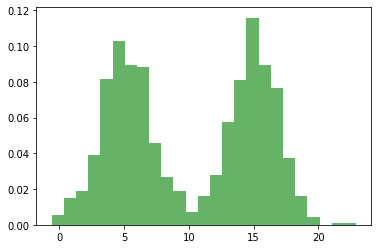

EPOCH  0
pi = 0.24309298044514463, mu = 3.4910330928191913, var = 1.4590212562553748
pi = 0.7569070195548554, mu = 12.193015885069755, var = 18.851844664613093


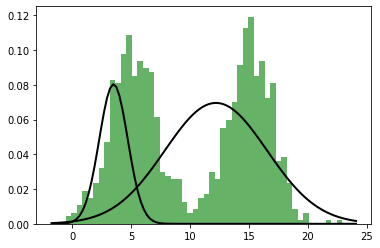

********************************
EPOCH  1
pi = 0.2571229283477507, mu = 3.9447857984044306, var = 1.7900113887383877
pi = 0.7428770716522493, mu = 12.2003093405089, var = 20.297642448912665


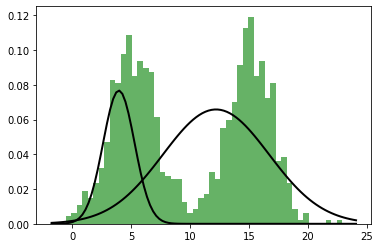

********************************
EPOCH  2
pi = 0.28663591567407354, mu = 4.233571621588322, var = 2.0140025331201956
pi = 0.7133640843259265, mu = 12.42581659037317, var = 19.985230222083963


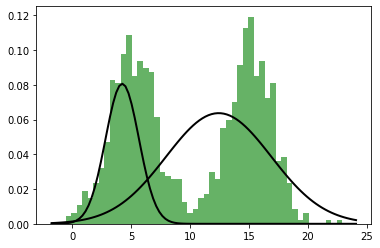

********************************
EPOCH  3
pi = 0.3192155403108145, mu = 4.405686245879967, var = 2.22961898189997
pi = 0.6807844596891856, mu = 12.737161246100712, var = 18.743865295025063


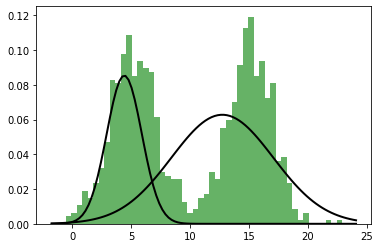

********************************
EPOCH  4
pi = 0.35156582074125414, mu = 4.504635249104358, var = 2.462710920123172
pi = 0.6484341792587459, mu = 13.099169407660867, var = 16.735926798820643


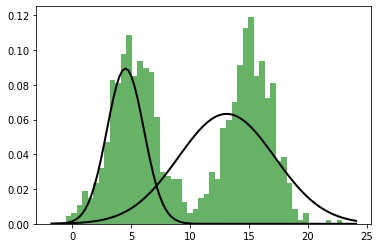

********************************
EPOCH  5
pi = 0.3836335139495953, mu = 4.573071224163482, var = 2.7023510662405497
pi = 0.6163664860504048, mu = 13.503721823660182, var = 14.051934256036175


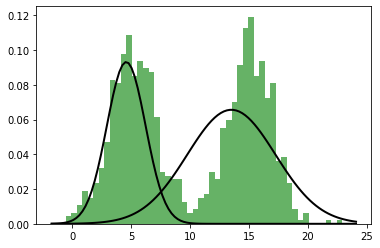

********************************
EPOCH  6
pi = 0.4152997075191208, mu = 4.654178581781829, var = 2.9065754789469502
pi = 0.5847002924808792, mu = 13.929779159174617, var = 11.044866004126817


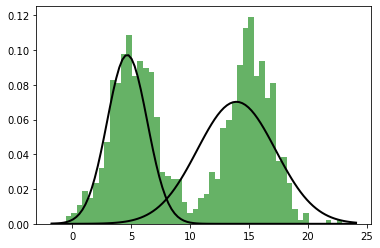

********************************
EPOCH  7
pi = 0.44474756900655055, mu = 4.7650147050167915, var = 3.0847143715548127
pi = 0.5552524309934495, mu = 14.332933638387631, var = 8.245389082173343


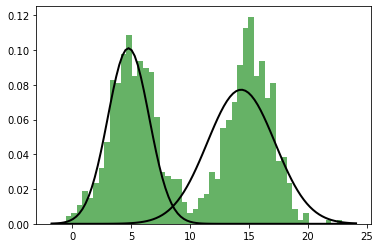

********************************
EPOCH  8
pi = 0.46891434409563054, mu = 4.887682918436265, var = 3.30476512648882
pi = 0.5310856559043694, mu = 14.660008674523848, var = 6.072524042875834


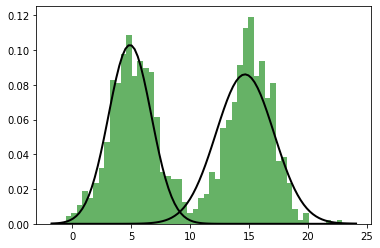

********************************
EPOCH  9
pi = 0.4860648668511382, mu = 4.998954764696925, var = 3.575167835375714
pi = 0.5139351331488617, mu = 14.880883163920098, var = 4.718611677303104


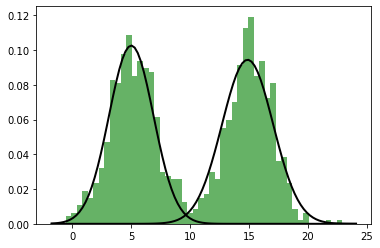

********************************


In [5]:
# Definig some synthetic 1-D data
np.random.seed(1)
data_1 = np.random.normal(5, 2, size=500)
data_2 = np.random.normal(15, 2, size=500)

data = np.concatenate((data_1,data_2)).reshape(-1, 1)
print("Number of datapoints : ", data.size)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
plt.show()

# initialize the clusters
n_clusters = 2
clusters = []
for i in range(n_clusters):
  clusters.append({'pi_k' : 1.0/n_clusters,
                   'mu_k' : i*10.0,
                   'var_k' : 1.0,
                   'gamma_nk' : np.zeros((data.size, 1))
                   })

# Fit the model to the data and find the mixture models parameters that best fit
# the data by alternating between the E and M steps
n_epochs = 10
for i in range(n_epochs):
  print("EPOCH ", i)
  E_step(data, clusters)
  M_step(data, clusters)
  # plotting the curves
  plt.hist(data, bins=50, density=True, alpha=0.6, color='g')
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  for cluster in clusters:
    print("pi = {}, mu = {}, var = {}".format(cluster['pi_k'], cluster['mu_k'], cluster['var_k']))
    p = norm.pdf(x, cluster['mu_k'], np.sqrt(cluster['var_k']))*cluster['pi_k']
    plt.plot(x, p, 'k', linewidth=2)
  # p1 = norm.pdf(x, )
  plt.show()
  print("********************************")